# Python for Biology: 5: APIs and Machine Learning

API: Application Programming Interface

 - computers talk to other computers
 - REST API (Representation State Transfer) - web

 

In [137]:
import pandas as pd
import requests
import json
import numpy as np

In [79]:
response = requests.get("https://goweather.herokuapp.com/weather/Khartoum")

In [80]:
response.status_code

200

In [81]:
response.ok

True

In [82]:
response.text

'{"temperature":"+33 째C","wind":"26 km/h","description":"Partly cloudy","forecast":[{"day":"1","temperature":"+33 째C","wind":"30 km/h"},{"day":"2","temperature":"34 째C","wind":"27 km/h"},{"day":"3","temperature":"35 째C","wind":"31 km/h"}]}'

In [83]:
decoded = json.loads(response.text)

In [84]:
decoded

{'description': 'Partly cloudy',
 'forecast': [{'day': '1', 'temperature': '+33 째C', 'wind': '30 km/h'},
  {'day': '2', 'temperature': '34 째C', 'wind': '27 km/h'},
  {'day': '3', 'temperature': '35 째C', 'wind': '31 km/h'}],
 'temperature': '+33 째C',
 'wind': '26 km/h'}

In [85]:
decoded.keys()

dict_keys(['temperature', 'wind', 'description', 'forecast'])

In [86]:
decoded['temperature']

'+33 째C'

In [87]:
decoded['forecast']

[{'day': '1', 'temperature': '+33 째C', 'wind': '30 km/h'},
 {'day': '2', 'temperature': '34 째C', 'wind': '27 km/h'},
 {'day': '3', 'temperature': '35 째C', 'wind': '31 km/h'}]

In [88]:
int("+32")

32

In [89]:
def hotOrNot(decodedResponse):
    """
    This function tells us whether it is currently very hot outside.
    """
    currentTemp = decodedResponse['temperature']
    tempN = int(currentTemp[:3])
    if tempN > 30: 
        return "It's wicked hot out!"
    else: 
        return "It's not so hot. Calm down already."


In [90]:
hotOrNot(decoded)

"It's wicked hot out!"

In [91]:
url = "https://api.covid19api.com/dayone/country/canada/status/confirmed"

In [92]:
response = requests.get(url)

In [93]:
decoded = json.loads(response.text)

In [94]:
type(decoded)

list

In [95]:
df = pd.DataFrame(decoded)

In [96]:
df

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Canada,CA,,,,56.13,-106.35,1,confirmed,2020-01-26T00:00:00Z
1,Canada,CA,,,,56.13,-106.35,1,confirmed,2020-01-27T00:00:00Z
2,Canada,CA,,,,56.13,-106.35,2,confirmed,2020-01-28T00:00:00Z
3,Canada,CA,,,,56.13,-106.35,2,confirmed,2020-01-29T00:00:00Z
4,Canada,CA,,,,56.13,-106.35,2,confirmed,2020-01-30T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...
550,Canada,CA,,,,56.13,-106.35,1202977,confirmed,2021-07-29T00:00:00Z
551,Canada,CA,,,,56.13,-106.35,1203700,confirmed,2021-07-30T00:00:00Z
552,Canada,CA,,,,56.13,-106.35,1204136,confirmed,2021-07-31T00:00:00Z
553,Canada,CA,,,,56.13,-106.35,1204496,confirmed,2021-08-01T00:00:00Z


In [97]:
dfDateCase = df[['Date', 'Cases']]

In [98]:
url = "http://openlibrary.org/api/books?bibkeys=ISBN:0201558025,LCCN:93005405"

In [99]:
params = {"bibkeys": "ISBN:0201558025,LCCN:93005405"}

In [100]:
response = requests.get("http://openlibrary.org/api/books", params=params)

In [101]:
response.ok

True

In [102]:
response.text.index('{')

18

In [103]:
responseClean = response.text[18:-1]

In [104]:
decoded = json.loads(responseClean)

In [105]:
type(decoded)

dict

In [106]:
decoded['ISBN:0201558025']

{'bib_key': 'ISBN:0201558025',
 'info_url': 'http://openlibrary.org/books/OL1429049M/Concrete_mathematics',
 'preview': 'restricted',
 'preview_url': 'https://archive.org/details/concretemathemat00grah_444',
 'thumbnail_url': 'https://covers.openlibrary.org/b/id/135182-S.jpg'}

In [107]:
url = "https://www.googleapis.com/books/v1/volumes"
params = {"q": "communist manifesto", "maxResults": 40}
response = requests.get(url, params=params)

In [108]:
response.ok

True

In [109]:
decoded = json.loads(response.text)

In [110]:
type(decoded)

dict

In [111]:
decoded.keys()

dict_keys(['kind', 'totalItems', 'items'])

In [112]:
decoded['totalItems']

1608

In [113]:
items = decoded['items']

In [114]:
type(items)

list

In [115]:
len(items)

40

In [116]:
items[0].keys()

dict_keys(['kind', 'id', 'etag', 'selfLink', 'volumeInfo', 'saleInfo', 'accessInfo', 'searchInfo'])

In [117]:
items[0]['volumeInfo']

{'allowAnonLogging': True,
 'authors': ['Karl Marx'],
 'averageRating': 3,
 'canonicalVolumeLink': 'https://play.google.com/store/books/details?id=OXJSaqiBaXMC',
 'categories': ['Philosophy'],
 'contentVersion': '1.4.3.0.preview.2',
 'description': 'Originally published on the eve of the 1848 European revolutions, The Communist Manifesto is a condensed and incisive account of the worldview Marx and Engels developed during their hectic intellectual and political collaboration. Formulating the principles of dialectical materialism, they believed that labor creates wealth, hence capitalism is exploitive and antithetical to freedom.',
 'imageLinks': {'smallThumbnail': 'http://books.google.com/books/content?id=OXJSaqiBaXMC&printsec=frontcover&img=1&zoom=5&edge=curl&source=gbs_api',
  'thumbnail': 'http://books.google.com/books/content?id=OXJSaqiBaXMC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'},
 'industryIdentifiers': [{'identifier': '9781476734293', 'type': 'ISBN_13'},
  {'

In [118]:
pubDates = []
for item in items: 
    year = item['volumeInfo']['publishedDate'][:4]
    try: 
        cleanYear = int(year)
        pubDates.append(cleanYear)
    except: 
        continue

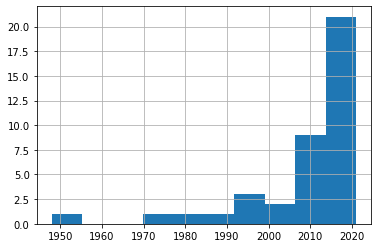

In [119]:
pd.Series(pubDates).hist()

# Machine Learning

In [120]:
# Let's get scikit-learn
import sklearn
from sklearn import datasets

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
linearRegression = LinearRegression()

In [123]:
type(linearRegression)

sklearn.linear_model._base.LinearRegression

In [124]:
dfDateCase

,Date,Cases
0,2020-01-26T00:00:00Z,1
1,2020-01-27T00:00:00Z,1
2,2020-01-28T00:00:00Z,2
3,2020-01-29T00:00:00Z,2
4,2020-01-30T00:00:00Z,2
...,...,...
550,2021-07-29T00:00:00Z,1202977
551,2021-07-30T00:00:00Z,1203700
552,2021-07-31T00:00:00Z,1204136
553,2021-08-01T00:00:00Z,1204496


In [125]:
def cleanDate(dateStr): 
    return dateStr[:10].replace('-', '')

dfDateCase['Date'] = dfDateCase['Date'].apply(cleanDate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [126]:
dates = dfDateCase['Date'].to_numpy().reshape((-1, 1))
cases = dfDateCase['Cases'].to_numpy().reshape((-1, 1))

In [127]:
linearRegression.fit(dates, cases)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
linearRegression.coef_

array([[84.75358305]])

In [129]:
linearRegression.intercept_

array([-1.71196342e+09])

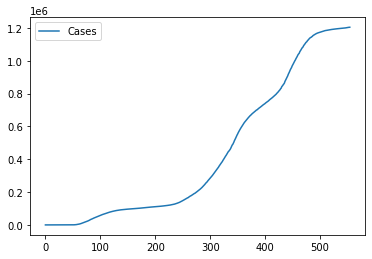

In [130]:
dfDateCase.plot()

In [134]:
dfDateCase['Predicted'] = linearRegression.predict(dfDateCase['Date'].to_numpy().reshape((-1, 1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


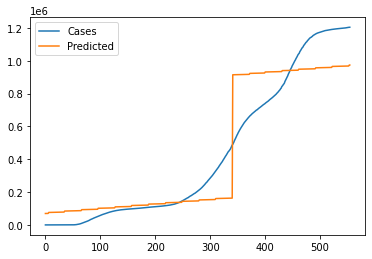

In [136]:
dfDateCase.plot()